## Homework 3 Yuqi(Peggy) Cao
This jupyter notebook is presented for MUSI 6001 homework 3. 
I use python and write it in jupyter notebook  

1) I use the pandas library to parse the csv file and import as a dataframe called "df".

In [1]:
import pandas


from IPython.display import HTML, display

df = pandas.read_csv('airquality.csv', header=0,
        names=['No.','Ozone',  'Solar.R',  'Wind',  'Temp',  'Month',  'Day'])
# print(df)


2) Then I used pandas library's functions to calcuate the mean, median, and mode for the wind speed and temperature variables.

In [2]:
mean_windspeed = df['Wind'].mean() # calculates the average of values under "Wind"
mean_temp = df['Temp'].mean() # calculates the average of values under "Temp"
median_windspeed = df['Wind'].median()
median_temp = df['Temp'].median()
mode_windspeed = df['Wind'].mode()
mode_temp = df['Temp'].mode()
# print(mode_windspeed[0])
# print(mode_temp[0])

Then I wrote those data as a table and print those out in pandas 's dataframe format

In [3]:
table = [
[mean_windspeed, mean_temp],    
[median_windspeed, median_temp],
[str.format('{0:.2f}', mode_windspeed[0]), str.format('{0:.2f}', mode_temp[0])]    
]

pandas.DataFrame(table, columns=["Wind speed", "Temperature"], 
                 index=["Mean", "Median", "Mode"])


,Wind speed,Temperature
Mean,9.95752,77.8824
Median,9.7,79
Mode,11.50,81.00


3) I use the matplotlib to plot those two plots

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# xxx = np.arange(1, 154, 1)
# print xxx

plot1 = df.plot(kind='scatter',x='No.',y='Solar.R', 
                title='Solar Radiation in 153 continuous days')
plot1.set_xlabel("Date in order")

Text(0.5,0,u'Date in order')

Text(0.5,0,u'Date in order')

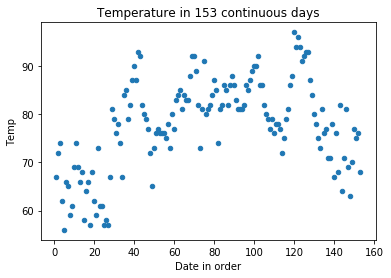

In [5]:
plot2 = df.plot(kind='scatter',x='No.',y='Temp', 
                title='Temperature in 153 continuous days')
plot2.set_xlabel("Date in order")

It seems that the temperature is closer to resembling a normal distribution

4) I used pandas 's functions to calculate the mean, the range (i.e., maximum and minimum values), and the standard deviation of the ozone values. Then simply print them out

In [6]:
mean1 = df['Ozone'].mean()
max1 = df['Ozone'].max() # calculates the max of all values under the Salary column
min1 = df['Ozone'].min()
std1 = df['Ozone'].std ()
print("mean: " + str.format('{0:.4f}', mean1))
range = (min1, max1)
print("range: " + str(range))
print("standard deviation: " + str.format('{0:.4f}', std1))

mean: 42.1293
range: (1.0, 168.0)
standard deviation: 32.9879


5) First, I calculate the range of 2 standard deviations of the mean

In [7]:
min_s = mean1 - std1 * 2
max_s = mean1 + std1 * 2
print min_s, max_s

-23.846458684 108.105079374


Then I iterate through the column of Ozone to count how many data is in this range. Then calculate the percent of it.

In [8]:
count = 0
rows = df['Ozone']
for row in rows:
    if min_s<=row<= max_s:
        count +=1
ans = count/153.0
print ans

0.718954248366


There's only 71.90% of the data fit within  2 standard deviations

6) In order to calculate the lowest temperature in May, I first group the dataframe with "Month" = 5, then use build-in function from pandas library to find the lowest temperature

In [9]:
is5 = df['Month']==5
newgroup = df[is5]
# print newgroup
print newgroup['Temp'].min()

56


7) I group the original data by Month and calculate mean value of colunn "Wind" and "Temp". Then plot them in the same figure with xticks well-setted.

            Wind       Temp
Month                      
5      11.622581  65.548387
6      10.266667  79.100000
7       8.941935  83.903226
8       8.793548  83.967742
9      10.180000  76.900000


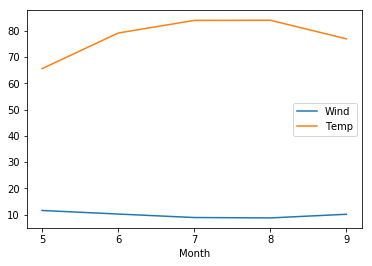

In [10]:
mean_w = df.groupby('Month')['Wind','Temp'].mean()
# mean_t = df.groupby('Month')['Temp'].mean()
new_plot = mean_w.plot(legend=True)
new_plot.set_xticks(mean_w.index)
print mean_w
# mean_w.plot(x='Month', y=['Wind', 'Temp'])